# Projet : prédire une réponse biologique
Prédire une réponse biologique des molécules à partir de leurs propriétés chimiques


## Prétraitement du jeu de données


In [1]:
# Import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive")
%cd  /content/drive/MyDrive/Biomarketers
%pwd

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1kvysfPHz20qIMQi4u95yq6zZglZXtTs_/Biomarketers


'/content/drive/.shortcut-targets-by-id/1kvysfPHz20qIMQi4u95yq6zZglZXtTs_/Biomarketers'

In [ ]:
#df = pd.read_csv("train.csv")

## Valeurs manquantes

In [ ]:
# Vérifier s'il y a des données manquantes (NaN)
print(f"Présence de valeur manquante : {df.isnull().values.any()}")

if df.isnull().values.any():
    # Remplacer les NaN par la médiane
    df.fillna(df.median(), inplace=True)
    print("Données manquantes traitées.")

Présence de valeur manquante : False


## Normaliser les données

In [ ]:
min_value = df.min().min()
max_value = df.max().max()

if min_value >= 0 and max_value <= 1:
    print("Les données semblent déjà normalisées.")
else:
    print("Les données ne semblent pas être normalisées.")

    # Normalisez les données (z-score)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df.drop(columns=['Activity']))

    # Réduction de dimensionnalité avec PCA (ajustez le nombre de composantes)
    pca = PCA(n_components=1776)
    X_pca = pca.fit_transform(X_scaled)

   # Visualiser
    #pca.fit(X_scaled)  # X_scaled est le résultat de la normalisation
    #variance_ratio = pca.explained_variance_ratio_
    #cumulative_variance_ratio = np.cumsum(variance_ratio)
    #plt.plot(cumulative_variance_ratio)
    #plt.xlabel("Nombre de composantes principales")
    #plt.ylabel("Variance cumulative expliquée")
    #plt.grid()
    #plt.show()
    #print("Les données ont été normalisées et réduites en dimension avec PCA.")

Les données semblent déjà normalisées.


## Corrélation

Dimension du jeu de données : (3751, 1777)


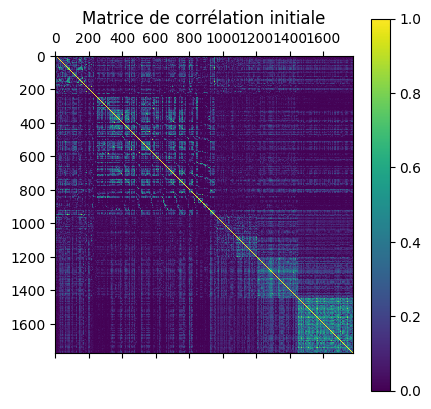

In [ ]:
print(f"Dimension du jeu de données : {df.shape}")
correlation_matrix = df.corr().abs()
plt.matshow(correlation_matrix)
plt.title("Matrice de corrélation initiale")
plt.colorbar()
plt.show()

# Seuil
threshold = 0.8

# Créez un masque pour les caractéristiques hautement corrélées
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Supprimez les descripteurs hautement corrélés
df_filtered = df.drop(columns=highly_correlated_features)

In [ ]:
print(f"Dimension du jeu de données après corrélation : {df.shape}")

# Calculer et afficher la matrice de corrélation après la suppression
#correlation_matrix_filtered = df_filtered.corr().abs()
#plt.matshow(correlation_matrix_filtered)
#plt.title("Matrice de corrélation après suppression")
#plt.colorbar()
#plt.show()

Dimension du jeu de données après corrélation : (3751, 1777)


## Valeurs aberrantes

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Masque pour les valeurs aberrantes
outlier_mask = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Liste des indices des lignes avec des valeurs aberrantes
outlier_indices = df[outlier_mask].index.tolist()


In [ ]:
df.shape

(3751, 1777)

## Créer data, train, test

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Séparer les données en caractéristiques (X) et variable cible (y)
X = df.drop(columns=['Activity'])
y = df['Activity']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sauvegarder les données d'entraînement dans des fichiers CSV
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

# Sauvegarder les données de test dans des fichiers CSV
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Data train et test

In [3]:
# Charger les données
X_train = pd.read_csv("X_train_final_30.csv")
X_test = pd.read_csv("X_test_final_30.csv")
X_test_kaggle = pd.read_csv("test.csv")

y_test = pd.read_csv("y_test_30.csv", index_col=0) # sans index
y_train = pd.read_csv("y_train_30.csv", index_col=0)

index = X_test['Unnamed: 0']

# Régression logistique

In [ ]:
#import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, f1_score

In [ ]:
# Entraînement d'un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Performances à soumettre sur le test de kaggle :
from sklearn.preprocessing import MinMaxScaler
X_test_Kaggle = pd.read_csv("test.csv")
print(X_test_Kaggle.shape)
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
X_scaled = scaler.fit_transform(X_test_Kaggle)
X_scaled = pd.DataFrame(X_scaled, columns = X_test_Kaggle.columns)# without the activity label
X_scaled = X_scaled[X_train.columns]
y_pred_test_proba = model.predict_proba(X_scaled)[:,1]
print(y_pred_test_proba)

# Créez un dictionnaire avec les données
data = {
    'MoleculeId': [i for i in range(1,2501+1 )],
    'PredictedProbability': y_pred_test_proba
}

# Créez un DataFrame à partir du dictionnaire
df = pd.DataFrame(data)

# Enregistrez le DataFrame au format CSV (ou tout autre format de votre choix)
df.to_csv('pred_regression.csv', index=False)

(2501, 1776)
[0.97536058 0.9989922  0.44377263 ... 0.94055222 0.91196283 0.90902162]


In [ ]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [ ]:
# Probabilités
probabilities = model.predict_proba(X_test)

In [ ]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

Précision du modèle : 76.20%
Matrice de confusion:
[[359 150]
 [118 499]]

Rapport de classification:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       509
           1       0.77      0.81      0.79       617

    accuracy                           0.76      1126
   macro avg       0.76      0.76      0.76      1126
weighted avg       0.76      0.76      0.76      1126



In [ ]:
# Calculer la ROC AUC
roc_auc = roc_auc_score(y_test, probabilities[:, 1])
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 0.83


In [ ]:
# Prédiction
results = pd.DataFrame({'Index': index, 'Prediction': y_pred})
results.to_csv('YPred_models/y_pred_logistic-regression_71.csv', index=False)

In [ ]:
# Probabilités
results2 = pd.DataFrame({'Index': index, 'Probabilities': probabilities[:, 1]})  # Probabilités de la classe 1
results2.to_csv('YPred_models/y_pred_prob_logistic-regression_71.csv', index=False)

In [ ]:
# Calculer la matrice de confusion et extraire les valeurs de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion.ravel()

sensibility = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_logistic = f1_score(y_test, y_pred)

# Afficher les métriques
print("Régression Logistique Metrics:")
print(f'Sensibilité (Recall): {sensibility:.2f}')
print(f'Spécificité: {specificity:.2f}')
print(f'F1-score: {f1_logistic:.2f}')

Régression Logistique Metrics:
Sensibilité (Recall): 0.81
Spécificité: 0.71
F1-score: 0.79


# Gradient Boosting
Les réseaux de neurones profonds sont adaptés aux données complexes et non structurées, comme les images, le texte et le son. Ils ont montré des performances exceptionnelles dans des domaines tels que la vision par ordinateur, le traitement du langage naturel et la recommandation. Gradient Boosting n'est pas du deep learning c'est une technique d'ensemble en apprentissage automatique. Utiliser des bibliothèques telles que Scikit-Learn ou XGBoost.


Le Gradient Boosting est une méthode d'ensemble qui combine plusieurs modèles faibles (généralement des arbres de décision peu profonds) pour former un modèle fort. L'idée fondamentale derrière le Gradient Boosting est d'ajuster itérativement les modèles faibles pour corriger les erreurs faites par les modèles précédents. Cela se fait en minimisant la perte (ou l'erreur) entre les prédictions du modèle actuel et les vraies valeurs cibles.

In [4]:
# Import
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, f1_score, roc_curve

In [5]:
# Créer un modèle Gradient Boosting
model = GradientBoostingClassifier()

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Créez un modèle Gradient Boosting
model = GradientBoostingClassifier()

# La grille de valeurs pour les hyperparamètres à optimiser
param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'estimateurs
    'learning_rate': [0.01, 0.1, 0.2],  # Taux d'apprentissage
    'max_depth': [3, 4, 5],  # Profondeur maximale de l'arbre
}

# Créez un objet GridSearchCV pour effectuer la recherche de grille
grid_search = GridSearchCV(model, param_grid, cv=5)  # cv est le nombre de plis pour la validation croisée

# Entraîner le modèle avec différentes combinaisons d'hyperparamètres
grid_search.fit(X_train, y_train)  # X_train et y_train sont vos données d'entraînement

# Les meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_

# Le meilleur modèle
best_model = grid_search.best_estimator_

# Prédire les probabilités des étiquettes pour les données de test
probabilities = best_model.predict_proba(X_test)

# Prédire avec le meilleur modèle
predictions = best_model.predict(X_test)

# Calculer l'accuracy sur les données de test
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Accuracy: 0.80


In [ ]:
# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [ ]:
# Prédire les probabilités des étiquettes pour les données de test
probabilities = model.predict_proba(X_test)

In [ ]:
# Prédire avec le modèle
predictions = model.predict(X_test)

In [ ]:
# Calculer l'accuracy sur les données de test
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [ ]:
# Prediction
results = pd.DataFrame({'Index': X_test['Unnamed: 0'], 'Prediction': predictions})
results.to_csv('YPred_models/y_pred_gradient-boosting_80.csv', index=False)

In [ ]:
# Probabilité
results1 = pd.DataFrame({'Index': X_test['Unnamed: 0'], 'Probabilities': probabilities[:, 1]}) # pour obtenir les probabilités de la classe 1
results1.to_csv('YPred_models/y_pred_prob_gradient-boosting_80.csv', index=False)

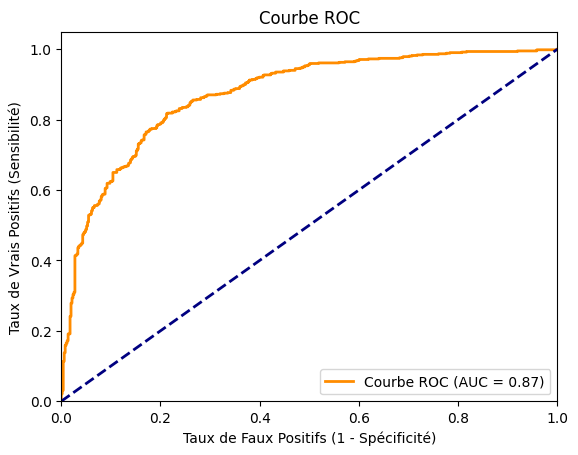

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


# Prédire les probabilités des étiquettes pour les données de test
probabilities = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (1 - Spécificité)')
plt.ylabel('Taux de Vrais Positifs (Sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Calculer la matrice de confusion et extraire les valeurs
confusion = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = confusion.ravel()

sensibility = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_gradient_boosting = f1_score(y_test, predictions)

# Afficher les métriques
print("Gradient Boosting Metrics:")
print(f'Sensibilité (Recall): {sensibility:.2f}')
print(f'Spécificité: {specificity:.2f}')
print(f'F1-score: {f1_gradient_boosting:.2f}')

Gradient Boosting Metrics:
Sensibilité (Recall): 0.85
Spécificité: 0.74
F1-score: 0.82


In [ ]:
X_train = pd.read_csv("X_train_final_30.csv", index_col=0)

# Performances à soumettre sur le test de kaggle :
from sklearn.preprocessing import MinMaxScaler
X_test_Kaggle = pd.read_csv("test.csv")
print(X_test_Kaggle.shape)
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
X_scaled = scaler.fit_transform(X_test_Kaggle)
X_scaled = pd.DataFrame(X_scaled, columns = X_test_Kaggle.columns)# without the activity label
X_scaled = X_scaled[X_train.columns]
y_pred_test_proba = model.predict_proba(X_scaled)[:,1]
print(y_pred_test_proba)

# Créez un dictionnaire avec les données
data = {
    'MoleculeId': [i for i in range(1,2501+1 )],
    'PredictedProbability': y_pred_test_proba
}

# Créez un DataFrame à partir du dictionnaire
df = pd.DataFrame(data)

# Enregistrez le DataFrame au format CSV (ou tout autre format de votre choix)
df.to_csv('pred_boosting.csv', index=False)

# SVM

In [ ]:
# Import
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, matthews_corrcoef,  roc_curve, auc
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
# Définir la grille d'hyperparamètres à rechercher
param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

In [ ]:
# Créer un classificateur SVM
svm_classifier = SVC()

In [ ]:
# Créer un objet GridSearchCV pour la recherche d'hyperparamètres
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

In [ ]:
# Effectuer la recherche d'hyperparamètres sur les données d'entraînement
time_start = time.time()
grid_search.fit(X_train, y_train.values.ravel())
print(f"Temps écoulé {time.time() - time_start}")

In [ ]:
# Obtenir les meilleurs hyperparamètres
best_params = grid_search.best_params_
print(f"Meilleurs hyperparamètres : {best_params}")

In [ ]:
# Entraîner le SVM avec les meilleurs hyperparamètres
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

In [ ]:
# Prédire les étiquettes pour les données de test
y_pred = best_svm.predict(X_test)

In [ ]:
# Prédire les probabilités pour les données de test
probabilities = best_svm.decision_function(X_test)

In [ ]:
# Mesurer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
# Afficher un rapport de classification (facultatif)
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
# Prediction
results = pd.DataFrame({'Index': index, 'Prediction': y_pred})
results.to_csv('YPred_models/y_pred_SVM_80.csv', index=False)

In [ ]:
# Probabilité
results1 = pd.DataFrame({'Index': index, 'Probabilities': probabilities})
results1.to_csv('YPred_models/y_pred_prob_SVM_80.csv', index=False)


In [ ]:
# Calculer la matrice de confusion et extraire les valeurs
confusion = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion.ravel()

sensibility = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_svm = f1_score(y_test, y_pred)

# Afficher les métriques
print("SVM Metrics:")
print(f'Sensibilité (Recall): {sensibility:.2f}')
print(f'Spécificité: {specificity:.2f}')
print(f'F1-score: {f1_svm:.2f}')

## Evaluation

In [ ]:
# Evaluation
# log loss = - 1/N * somme(yi * log(yi_estime) + (1 - yi) * log(1 - yi_estime))
import math
def compute_log_loss_for_one_sample(y_obs, y_pred):
  return -(y_obs * math.log(y_pred) + (1-y_obs)*math.log(1-y_pred))

def compute_log_loss(y_obs, y_pred):
  """
  Computing the log loss metric.
  y_obs = the data we have, the "real" data (vector)
  """
  log_loss = -np.mean(y_obs * np.log(y_pred) + (1-y_obs)*np.log(1-y_pred))
  return log_loss

## Test 1

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Créer un modèle Gradient Boosting
model = GradientBoostingClassifier()

# Entraîner le modèle sur vos données d'entraînement
model.fit(X_train, y_train)

# Prédiser avec le modèle
predictions = model.predict(X_test)

# Calcul de l'accuracy sur les données de test
accuracy = accuracy_score(y_test, predictions)

# Affichage de l'accuracy formatée
print(f'Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.80


# XGBoost

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

## avec optimisation

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
param_grid ={
    'max_depth':[3,4,5],
    'learning_rate':[0.01,0.1,0.2],
    'n_estimators':[100,200,300]
}

model=XGBClassifier()
grid_search=GridSearchCV(model,param_grid,cv=5,n_jobs=1,verbose=2)



In [ ]:
start_time = time.time()
grid_search.fit(X_train,y_train)
execution_time=time.time() - start_time

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   3.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  16.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   6.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=  20.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [ ]:
print("best param ", grid_search.best_params_)
print(f"temps exécution {execution_time} ")

best param  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
temps exécution 655.1052322387695 


In [ ]:
best_model = grid_search.best_estimator_

# Performances à soumettre sur le test de kaggle :
from sklearn.preprocessing import MinMaxScaler
X_test_Kaggle = pd.read_csv("test.csv")
print(X_test_Kaggle.shape)
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
X_scaled = scaler.fit_transform(X_test_Kaggle)
X_scaled = pd.DataFrame(X_scaled, columns = X_test_Kaggle.columns)# without the activity label
X_scaled = X_scaled[X_train.columns]
y_pred_test_proba = best_model.predict_proba(X_scaled)[:,1]
print(y_pred_test_proba)

# Créez un dictionnaire avec les données
data = {
    'MoleculeId': [i for i in range(1,2501+1 )],
    'PredictedProbability': y_pred_test_proba
}

# Créez un DataFrame à partir du dictionnaire
df = pd.DataFrame(data)

# Enregistrez le DataFrame au format CSV (ou tout autre format de votre choix)
df.to_csv('pred_xgboost.csv', index=False)

(2501, 1776)
[0.86732656 0.9644189  0.38849494 ... 0.65705365 0.660954   0.11521997]


In [ ]:
best_model = grid_search.best_estimator_
y_train_pred=best_model.predict(X_train)
y_test_pred=best_model.predict(X_test)

y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]

# les prédictions dans un fichier CSV
results = pd.DataFrame({'Index': index, 'Prediction': y_test_pred})
results.to_csv('YPred_models/y_pred_xgboost_80.csv', index=False)

# les probabilités dans un autre fichier CSV
results1 = pd.DataFrame({'Index': index, 'Probabilities': y_test_pred_prob})
results1.to_csv('YPred_models/y_pred_prob_xgboost_80.csv', index=False)

In [ ]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1208
           1       0.91      0.93      0.92      1417

    accuracy                           0.91      2625
   macro avg       0.91      0.91      0.91      2625
weighted avg       0.91      0.91      0.91      2625

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       509
           1       0.80      0.84      0.82       617

    accuracy                           0.80      1126
   macro avg       0.80      0.79      0.79      1126
weighted avg       0.80      0.80      0.79      1126



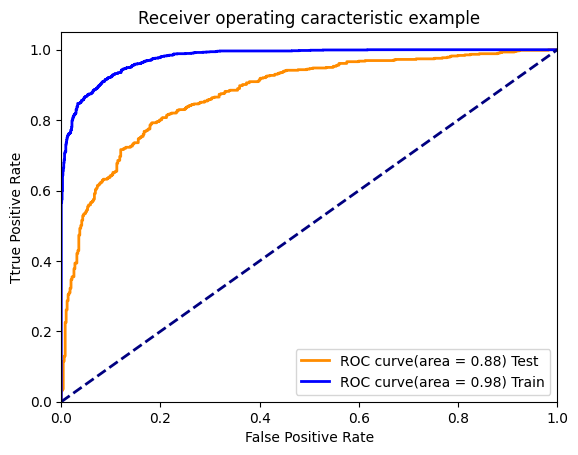

In [ ]:
# courbe roc pour test
y_train_pred_prob = best_model.predict_proba(X_train)[:,1]
y_test_pred_prob = best_model.predict_proba(X_test)[:,1]

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# courbe roc pour train
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# affichage
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve(area = %0.2f) Test' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve(area = %0.2f) Train' % roc_auc_train)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("Ttrue Positive Rate")
plt.title("Receiver operating caracteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculer la matrice de confusion et extraire les valeurs
confusion_test = confusion_matrix(y_test, y_test_pred)
TN_test, FP_test, FN_test, TP_test = confusion_test.ravel()

# Calculer la sensibilité et la spécificité
sensibility_test = TP_test / (TP_test + FN_test)
specificity_test = TN_test / (TN_test + FP_test)

# Calculer le F1-score
f1_test = f1_score(y_test, y_test_pred)

# Afficher les métriques
print("Test Accuracy:", accuracy_test)
print("Test Sensitivity (Recall):", sensibility_test)
print("Test Specificity:", specificity_test)
print("Test F1-score:", f1_test)


Test Accuracy: 0.7957371225577264
Test Sensitivity (Recall): 0.8411669367909238
Test Specificity: 0.7406679764243614
Test F1-score: 0.8186119873817035


In [ ]:
# Prediction
results = pd.DataFrame({'Index': X_test['Unnamed: 0'], 'Prediction': predictions})
results.to_csv('YPred_models/y_pred_gradient-boosting_80.csv', index=False)
# Probabilité
results1 = pd.DataFrame({'Index': X_test['Unnamed: 0'], 'Probabilities': probabilities[:, 1]}) # pour obtenir les probabilités de la classe 1
results1.to_csv('YPred_models/y_pred_prob_gradient-boosting_80.csv', index=False)

# Random Forest

In [ ]:
# Exemple de modèle (utilisez le modèle de votre choix)
from sklearn.ensemble import RandomForestClassifier

# Créer et entraîner un modèle
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Évaluer le modèle sur les données de test
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

<ipython-input-4-1b361e115f0a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 0.81


In [ ]:
#Test 2
# Moyen car accuracy monte que à 0.82

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Créer un modèle Random Forest
model = RandomForestClassifier(random_state=42)

# Définir la grille des paramètres à explorer (limitez les valeurs)
param_grid = {
    'n_estimators': [100, 150],  # Limiter le nombre d'estimateurs
    'max_depth': [10, 20],  # Limiter la profondeur des arbres
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Créer un objet GridSearchCV avec validation croisée stratifiée
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Entraîner le modèle avec la recherche en grille sur un sous-ensemble des données
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et la meilleure précision
print("Meilleurs paramètres trouvés :")
print(grid_search.best_params_)
print("Meilleure précision trouvée :", grid_search.best_score_)

# Obtenir le modèle avec les meilleurs paramètres
best_model = grid_search.best_estimator_

# Évaluer le modèle sur les données de test
accuracy = best_model.score(X_test, y_test)
print(f'Accuracy sur les données de test: {accuracy:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: Fut

Meilleurs paramètres trouvés :
{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Meilleure précision trouvée : 0.7828571428571427
Accuracy sur les données de test: 0.82


# RNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



# Créer un modèle RNN avec Keras
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1776, output_dim=128))  # Couche d'embedding
model.add(layers.SimpleRNN(128, activation='tanh', return_sequences=True))  # Couche RNN avec activation tanh
model.add(layers.SimpleRNN(128, activation='tanh'))  # Ajouter une autre couche RNN
model.add(layers.Dense(1, activation='sigmoid'))  # Couche de sortie avec activation sigmoid

# Compiler le modèle avec un taux d'apprentissage plus faible
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Ajouter de la régularisation L2
from tensorflow.keras import regularizers
model.add(layers.SimpleRNN(128, activation='tanh', return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.SimpleRNN(128, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))

# Ajouter du dropout
model.add(layers.Dropout(0.2))

# Entraîner le modèle avec un plus grand nombre d'epochs
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Évaluer le modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


ValueError: ignored

# GridSearch

### RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200], # nombre d'arbres dans la forêt aléatoire.
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print(f'Accuracy with the best Random Forest Model: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Accuracy with the best Random Forest Model: 0.81


### CNN

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 26.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow import keras
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape, Activation, Dropout, Add
from keras import Sequential
from keras.layers import BatchNormalization, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.models import Model
import matplotlib.pyplot as plt
import os
import numpy as np
import argparse
import pandas as pd
import math
from kerastuner.tuners import RandomSearch

In [ ]:
def build_mlp_model(input_shape):
    input_layer = Input(shape=input_shape)
    x = Dense(64, activation='relu')(input_layer)
    x = Dense(32, activation='relu')(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Utilisation de la fonction pour créer le modèle
model = build_mlp_model(input_shape=(X_train.shape[1],))


In [ ]:
print(X_train.shape)

(2625, 1112)


In [ ]:
#hyperparamètres
tuner = RandomSearch(
    build_mlp_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='my_project'
)

#meilleure combinaison hyperparamètre
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)


KeyError: ignored

In [ ]:
#resultat
tuner.results_summary()

NameError: ignored

In [ ]:
# meilleure hyperparamètre
best_model = tuner.get_best_models(num_models=1)[0]

# évaluer modèle sur données test
accuracy = best_model.evaluate(X_test, y_test)
print(f'Accuracy with the best CNN Model: {accuracy[1]:.2f}')

# Dense

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f'Accuracy Dense Model: {accuracy:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Dense Model: 0.77


# Vérifier logloss

In [ ]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Prédire les probabilités
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculer la log loss
logloss = log_loss(y_test, y_pred_prob)
print(f'Log Loss: {logloss:.2f}')

#  La courbe ROC

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Validation croisée

 Un score de modèle plus élevé est généralement préférable

In [ ]:
from sklearn.model_selection import cross_val_score

# Effectuez une validation croisée à 5 plis et obtenez les scores
scores = cross_val_score(model, X_train, y_train, cv=5)

print("Scores de validation croisée :", scores)

# Afficher la moyenne des scores
print("Moyenne des scores de validation croisée :", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Scores de validation croisée : [0.71238095 0.73333333 0.72952381 0.72571429 0.74857143]
Moyenne des scores de validation croisée : 0.729904761904762


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


### Gradient Boosting
Une technique d'ensemble en apprentissage automatique. Utiliser des bibliothèques telles que Scikit-Learn ou XGBoost.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Créez un modèle Gradient Boosting
model = GradientBoostingClassifier()

# Entraînez le modèle sur vos données d'entraînement
model.fit(X_train, y_train)

# Prédisez avec le modèle
predictions = model.predict(X_test)

# CNN

In [ ]:
# Dataset
#X_train = pd.read_csv("X_train.csv")
#y_train = pd.read_csv("y_train.csv", index_col=[0])

#X_test= pd.read_csv("X_test.csv")
#y_test= pd.read_csv("y_test.csv", index_col=[0])

print(f"Train X :{X_train.shape}\nTrain y : {y_train.shape}\nTest X : {X_test.shape}\nTest y :{y_test.shape}")

Train X :(2625, 1112)
Train y : (2625, 1)
Test X : (1126, 1112)
Test y :(1126, 1)


In [ ]:
# Modèle CNN
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
66/66 [==============================] - 9s 115ms/step - loss: 0.6557 - accuracy: 0.6338 - val_loss: 0.5693 - val_accuracy: 0.7219
Epoch 2/10
66/66 [==============================] - 9s 135ms/step - loss: 0.5431 - accuracy: 0.7290 - val_loss: 0.5108 - val_accuracy: 0.7581
Epoch 3/10
66/66 [==============================] - 7s 112ms/step - loss: 0.4837 - accuracy: 0.7738 - val_loss: 0.4992 - val_accuracy: 0.7924
Epoch 4/10
66/66 [==============================] - 9s 130ms/step - loss: 0.4290 - accuracy: 0.8081 - val_loss: 0.5106 - val_accuracy: 0.7829
Epoch 5/10
66/66 [==============================] - 7s 110ms/step - loss: 0.4014 - accuracy: 0.8238 - val_loss: 0.5046 - val_accuracy: 0.7714
Epoch 6/10
66/66 [==============================] - 10s 144ms/step - loss: 0.3738 - accuracy: 0.8348 - val_loss: 0.5427 - val_accuracy: 0.7771
Epoch 7/10
66/66 [==============================] - 9s 144ms/step - loss: 0.3587 - accuracy: 0.8433 - val_loss: 0.5360 - val_accuracy: 0.7752
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


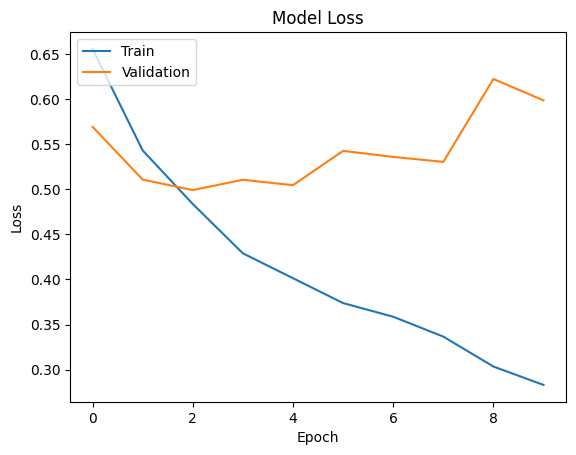

In [ ]:
#Loss
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


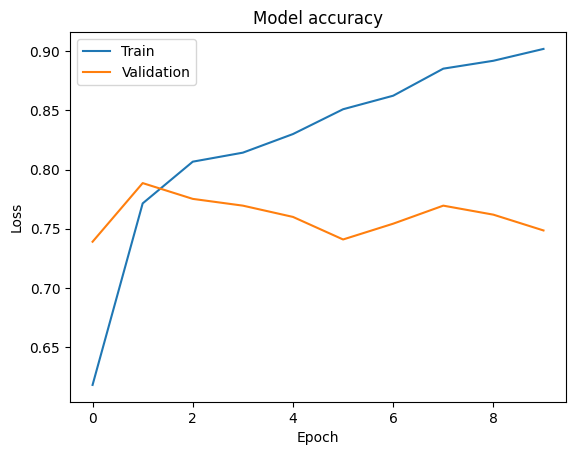

In [ ]:
# Accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Test
model.predict(X_test)

36/36 [==============================] - 1s 20ms/step


array([[0.9915649 ],
       [0.6342783 ],
       [0.8938601 ],
       ...,
       [0.566105  ],
       [0.87284404],
       [0.66999537]], dtype=float32)

In [ ]:
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy: {accuracy:.2f}')

36/36 [==============================] - 1s 20ms/step - loss: 0.7654 - accuracy: 0.7558
Accuracy: 0.76


# Réseaux de neurones récurrents (RNN) avec des couches LSTM ou GRU

-> pas de bon résultats

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assurez-vous que vos données sont au format numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Créer un modèle séquentiel
model = Sequential()

# Ajouter une couche LSTM avec un certain nombre d'unités (neurones) et une forme d'entrée appropriée
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))

# Ajouter une couche de sortie Dense avec une activation appropriée (par exemple, sigmoid pour une classification binaire)
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle avec une fonction de perte appropriée (par exemple, 'binary_crossentropy' pour une classification binaire) et un optimiseur (par exemple, 'adam')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Évaluer le modèle sur les données de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/10
 3/83 [>.............................] - ETA: 1:35 - loss: 0.6939 - accuracy: 0.4792

KeyboardInterrupt: ignored